1.理论题

1.1 简述在adversarial attack中怎么限定用来攻击的图像样本不会于原始图片相差太远？
#### 增加约束，使得加入噪音的图像样本与原始图像样本距离小于某个阈值

1.2 强化学习中计算reward为什么使用了$\gamma$ ?
#### 衰退系数γ相当与给不同时间的奖励设置了权重。γ=1说明每个时刻的奖励同等重要，γ<1则表示现在的奖励比未来的奖励重要。通常来讲，近期的奖励会重要一些。所以γ会小于1。γ小于1还带来另一个好处。G表示未来奖励的累加。对于无限时间序列状态的模型，如果没有衰退系统γ，G就不收敛，无法求出来。有了小于1的γ，G就会收敛。

1.3 TD算法和蒙特卡洛以及value iteration算法有什么关系？
#### MC可以解决无模型的强化学习问题，但是有其局限性，需解决的强化学习问题都是episode的，即存在一个终止状态（terminal state），使得每次对环境的采样以有限步结束。TD算法结合了DP 和Monte Carlo算法的优点，不仅可以单步更新，而且可以根据经验进行学习。

1.4 NN4G模型中怎么更新每一层的隐状态，以及怎么计算全图的表示？
#### 用neighbor feature updata下一层的隐状态，把所有 nodes 的 feature 集合起來代表整个 graph（类似LSTM把整个句子向量压缩为一个向量）

1.5 为什么说Transformer也是一种基于注意力的图神经网络？
#### Transformer通过将输入两两相连，之后进行KQV的计算，从这个角度可以看为图神经网络

1.6 VAE的训练中为什么要使用reparameterised form ?
#### 得到sampled latent vector的时候需要经过采样， 采样操作无法求导数，因此需要使用reparameterised form

1.7 简述什么是meta-learning ?
#### meta learning将GANs的传统训练思维，由用数据去匹配模型，转变为用模型去匹配数据，为解决生成模型的少样本学习问题提供了突破口。

1.8 简述correlation和causality的不同？
#### Correlation只能表明两个的变化关系：一个变量发生变化的时候，另一个变量也发生变化。但是，这不能表明另一个变量的变化是由其中一个变量的变化引起的。
#### Causality 表明因果关系：一个变量的变化，带来另一个变量的变化。

2.实践题（强化学习）

In [1]:
import matplotlib
import matplotlib.pyplot as plt
import numpy as np
from matplotlib.table import Table

In [2]:
def draw_image(image):
    fig,ax = plt.subplots()
    ax.set_axis_off()
    tb = Table(ax,bbox=[0,0,1,1])

    nrows,ncols = image.shape
    width,height = 1.0/ncols,1.0/nrows

    for (i,j), val in np.ndenumerate(image):
        if (i,j) == (0,1):
            val = "A"
        elif (i,j) == (0,3):
            val = "B"
        elif (i,j) == (4,1):
            val = "A'"
        elif (i,j) == (2,3):
            val = "B'"
        tb.add_cell(i,j,width,height,text=val,
                    loc='center',facecolor='white')

    for i in range(len(image)):
        tb.add_cell(i,-1,width,height,text=i+1,loc='right',
                    edgecolor='none',facecolor='none')
        tb.add_cell(-1,i,width,height/2,text=i+1,loc='center',
                    edgecolor='none',facecolor='none')
    ax.add_table(tb)

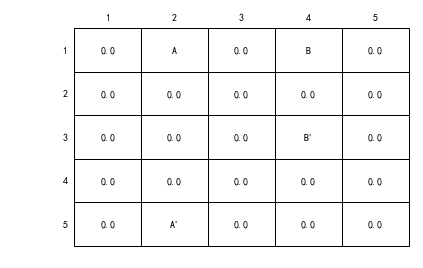

In [3]:
WORLD_SIZE=5
draw_image(np.zeros((WORLD_SIZE,WORLD_SIZE)))

Figure above shows a rectangular gridworld. The cell of the grid correspond to the state of the environment. At each cell, four actions with equal probability are possible: north, south, east and west, which deterministically cause the agent to move one cell in the respective direction on the grid. Actions that would take the agent off the grid leave its unchanged, but also result in a reward -1. Other actions result in a reward of 0, expect those taht move the agent out of the special states A and B. From state A, all four actions yield a reward of +10 and take the agent to A'. From state B, all actions yield a reward of +5 and take the agent to B'.

#### Try to compute the value of each state ? You can choose any algorithms we leanred in the class.¶

In [8]:
A = np.array([1,2]) - 1
B = np.array([1,4]) - 1
A_ = np.array([5, 2]) - 1
B_ = np.array([3, 4]) - 1

values = np.zeros((5,5))
print(values)
print(A)
print(B)
actions = np.array([
    [-1, 0],
    [1, 0],
    [0, 1],
    [0, -1],
])
print(actions)

[[0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0.]]
[0 1]
[0 3]
[[-1  0]
 [ 1  0]
 [ 0  1]
 [ 0 -1]]


In [9]:
def getNextActionAndReword(x, y, act):
    pos = np.array([x, y])
    if (pos == A).all():
        return A_, 10
    if (pos == B).all():
        return B_, 5
    nextPos = pos + act
    if nextPos[0] < 0 or nextPos[0] > 4 or nextPos[1] < 0 or nextPos[1] > 4:
        return pos, -1
    return nextPos, 0
        
 
tempValues = np.ones((5,5))
maxCount = 10000
loopCount = 0
while np.sum(np.abs(tempValues - values)) > 0.000001 and loopCount < maxCount:
    values = np.copy(tempValues)
    for x in  range(5):
        for y in range(5):
            tempValues[x, y] = 0
            for act in actions:
                nextAction, reword = getNextActionAndReword(x, y, act)
                tempValues[x, y] += 1/4 * (reword + 0.9 * values[nextAction[0], nextAction[1]])
    loopCount += 1
values = np.copy(tempValues)

print(loopCount)
print(np.round(values, decimals=2))

142
[[ 3.31  8.79  4.43  5.32  1.49]
 [ 1.52  2.99  2.25  1.91  0.55]
 [ 0.05  0.74  0.67  0.36 -0.4 ]
 [-0.97 -0.44 -0.35 -0.59 -1.18]
 [-1.86 -1.35 -1.23 -1.42 -1.98]]


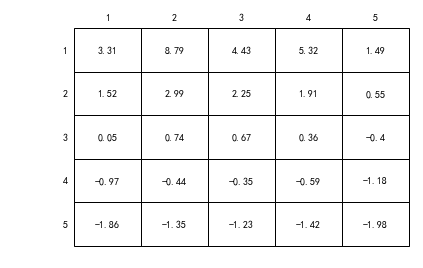

In [10]:
def draw_image(image):
    fig, ax = plt.subplots()
    ax.set_axis_off()
    tb = Table(ax, bbox=[0,0,1,1])

    nrows, ncols = image.shape
    width, height = 1.0/ncols,1.0/nrows

    for (i,j), val in np.ndenumerate(image):
        tb.add_cell(i, j, width, height, text=val,
                    loc='center', facecolor='white')

    for i in range(len(image)):
        tb.add_cell(i, -1, width, height, text=i+1, loc='right',
                    edgecolor='none', facecolor='none')
        tb.add_cell(-1, i, width, height/2, text=i+1, loc='center',
                    edgecolor='none', facecolor='none')
    ax.add_table(tb)

draw_image(np.round(values, decimals=2))
